In [ ]:
import pandas as pd

file_path = '/content/spam mail.csv'
df = pd.read_csv(file_path)
print(df.head())
spam_emails = df[df['Category'] == 'spam']['Masseges'].tolist()
ham_emails = df[df['Category'] == 'ham']['Masseges'].tolist()
print(f"Number of spam emails: {len(spam_emails)}")
print(f"Number of ham emails: {len(ham_emails)}")


  Category                                           Masseges
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Number of spam emails: 747
Number of ham emails: 4825


In [ ]:
!pip install pandas nltk


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
file_path = '/content/spam mail.csv'
df = pd.read_csv(file_path)
print(df.head())


  Category                                           Masseges
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:

def preprocess_text(text, use_stemming=True):

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    if use_stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df.dropna(subset=['Masseges'], inplace=True)

df['cleaned_text'] = df['Masseges'].apply(preprocess_text)

print(df[['Masseges', 'cleaned_text']].head())


                                            Masseges  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


In [ ]:
print(df[['Masseges', 'cleaned_text']].head())
spam_emails = df[df['Category'] == 'spam']['cleaned_text'].tolist()
ham_emails = df[df['Category'] == 'ham']['cleaned_text'].tolist()

print(f"Number of cleaned spam emails: {len(spam_emails)}")
print(f"Number of cleaned ham emails: {len(ham_emails)}")


                                            Masseges  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  
Number of cleaned spam emails: 747
Number of cleaned ham emails: 4825


In [ ]:
df['cleaned_text'] = df['Masseges'].apply(lambda x: preprocess_text(x, use_stemming=False))


In [ ]:
!pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
file_path = '/content/spam mail.csv'
df = pd.read_csv(file_path)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)
df.dropna(subset=['Masseges'], inplace=True)
df['cleaned_text'] = df['Masseges'].apply(preprocess_text)
print(df[['Masseges', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            Masseges  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
X = df['cleaned_text']
y = df['Category']

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)
chi2_selector = SelectKBest(chi2, k=10)
X_chi2 = chi2_selector.fit_transform(X_tfidf, y)
selected_indices = chi2_selector.get_support(indices=True)
selected_features = [tfidf_vectorizer.get_feature_names_out()[i] for i in selected_indices]

print("Selected features using Chi-Square:", selected_features)
mi_selector = SelectKBest(mutual_info_classif, k=10)
X_mi = mi_selector.fit_transform(X_tfidf, y)
selected_indices_mi = mi_selector.get_support(indices=True)
selected_features_mi = [tfidf_vectorizer.get_feature_names_out()[i] for i in selected_indices_mi]

print("Selected features using Mutual Information:", selected_features_mi)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]


Selected features using Chi-Square: ['award', 'call', 'claim', 'free', 'mobil', 'prize', 'servic', 'tone', 'txt', 'urgent']


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warni

Selected features using Mutual Information: ['call', 'claim', 'free', 'get', 'mobil', 'repli', 'stop', 'text', 'txt', 'ur']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
classifier = MultinomialNB()
classifier.fit(X_train_selected, y_train)
y_pred = classifier.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8654708520179372
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
classifier = MultinomialNB()
classifier.fit(X_train_selected, y_train)
y_pred = classifier.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8654708520179372
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import os
df = pd.read_csv('/content/spam mail.csv')
spam_folder = '/content/spamassassin/spam/'
ham_folder = '/content/spamassassin/ham/'
spam_emails = []
try:
    for filename in os.listdir(spam_folder):
        if filename.endswith('.txt'):
            with open(os.path.join(spam_folder, filename), 'r', encoding='latin-1') as file:
                spam_emails.append({'Masseges': file.read(), 'Category': 'spam'})
except FileNotFoundError:
    print(f"Spam folder not found: {spam_folder}")
ham_emails = []
try:
    for filename in os.listdir(ham_folder):
        if filename.endswith('.txt'):
            with open(os.path.join(ham_folder, filename), 'r', encoding='latin-1') as file:
                ham_emails.append({'Masseges': file.read(), 'Category': 'ham'})
except FileNotFoundError:
    print(f"Ham folder not found: {ham_folder}")
df_spam = pd.DataFrame(spam_emails)
df_ham = pd.DataFrame(ham_emails)
df_combined = pd.concat([df, df_spam, df_ham], ignore_index=True)
print(df_combined.head())
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_tfidf = tfidf_vectorizer.fit_transform(df_combined['Masseges'])
y = df_combined['Category']


Spam folder not found: /content/spamassassin/spam/
Ham folder not found: /content/spamassassin/ham/
  Category                                           Masseges
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_tfidf = tfidf_vectorizer.fit_transform(df_combined['Masseges'])
y = df_combined['Category']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=1000)

X_bow = count_vectorizer.fit_transform(df_combined['Masseges'])


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

chi2_selector = SelectKBest(chi2, k=100)
X_chi2 = chi2_selector.fit_transform(X_tfidf, y)
selected_indices = chi2_selector.get_support(indices=True)
selected_features = tfidf_vectorizer.get_feature_names_out()[selected_indices]

print("Selected features using Chi-Square:", selected_features)


Selected features using Chi-Square: ['000' '0800' '100' '1000' '10p' '12' '12hrs' '150' '150p' '150ppm' '16'
 '2000' '250' '350' '4u' '50' '500' '5000' '750' '800' 'anyway' 'attempt'
 'await' 'award' 'awarded' 'blue' 'bother' 'buy' 'came' 'case' 'charge'
 'chennai' 'christmas' 'claim' 'class' 'club' 'collect' 'complimentary'
 'couple' 'crave' 'da' 'dear' 'download' 'even' 'face' 'friends' 'gal'
 'gets' 'guys' 'hurt' 'knw' 'land' 'later' 'like' 'lt' 'mob' 'mobile'
 'much' 'nah' 'net' 'never' 'noe' 'opt' 'or' 'orange' 'order' 'outside'
 'phone' 'points' 'post' 'prize' 'prob' 'rakhesh' 'rates' 'red' 'rest'
 'rock' 'sale' 'service' 'services' 'sick' 'still' 'telling' 'times'
 'told' 'tomo' 'trying' 'txts' 'unlimited' 'ur' 'usf' 'very' 'visit'
 'weekend' 'winner' 'with' 'won' 'wont' 'xmas' 'your']


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_tfidf, y)

mi_df = pd.DataFrame({'feature': tfidf_vectorizer.get_feature_names_out(), 'mutual_info': mutual_info})
mi_df = mi_df.sort_values(by='mutual_info', ascending=False)

top_k = 100
top_features = mi_df.head(top_k)

print("Top features based on mutual information:")
print(top_features)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Top features based on mutual information:
    feature  mutual_info
855      to     0.213384
139    call     0.135285
991     you     0.122212
992    your     0.094815
830     the     0.082615
..      ...          ...
937    what     0.012604
312    find     0.012529
599  number     0.012465
463  latest     0.012458
15   150ppm     0.012384

[100 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# RFE for feature selection
rfe = RFE(model, n_features_to_select=100)  # Adjust number of features as needed
X_rfe = rfe.fit_transform(X_tfidf, y)

# Get the selected features
selected_features_rfe = tfidf_vectorizer.get_feature_names_out()[rfe.support_]

print("Selected features using RFE:", selected_features_rfe)


Selected features using RFE: ['100' '1000' '10p' '150p' '16' '18' '50' '500' '800' 'ac' 'am' 'at'
 'award' 'awarded' 'box' 'but' 'call' 'camera' 'can' 'cash' 'chat' 'claim'
 'co' 'code' 'com' 'come' 'contact' 'cost' 'cs' 'customer' 'delivery'
 'draw' 'expires' 'find' 'for' 'free' 'from' 'games' 'going' 'gt' 'he'
 'holiday' 'how' 'http' 'it' 'landline' 'later' 'latest' 'll' 'lt' 'ltd'
 'me' 'message' 'min' 'mins' 'mob' 'mobile' 'msg' 'my' 'network' 'new'
 'nokia' 'now' 'ok' 'or' 'orange' 'our' 'per' 'private' 'prize' 'rate'
 'receive' 'reply' 'ringtone' 'selected' 'send' 'service' 'services'
 'shows' 'sms' 'statement' 'stop' 'text' 'that' 'to' 'tone' 'tones' 'txt'
 'uk' 'ur' 'urgent' 'video' 'week' 'who' 'win' 'with' 'wk' 'won' 'www'
 'your']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_chi2, y, test_size=0.2, random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8887892376681614
              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       965
        spam       1.00      0.17      0.30       150

    accuracy                           0.89      1115
   macro avg       0.94      0.59      0.62      1115
weighted avg       0.90      0.89      0.85      1115



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = df_combined['Masseges']
y = df_combined['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training size:", len(X_train))
print("Testing size:", len(X_test))


Training size: 3900
Testing size: 1672


In [ ]:
print("Dataset Summary:")
print(df_combined.describe())
print("\nClass Distribution:")
print(df_combined['Category'].value_counts())


Dataset Summary:
       Category                Masseges
count      5572                    5572
unique        2                    5169
top         ham  Sorry, I'll call later
freq       4825                      30

Class Distribution:
Category
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, y_train)
y_pred_mnb = mnb_model.predict(X_test_tfidf)

print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_mnb))


Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       0.98      0.80      0.88       219

    accuracy                           0.97      1672
   macro avg       0.97      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
from sklearn.naive_bayes import GaussianNB

X_train_gnb = X_train_tfidf.toarray()
X_test_gnb = X_test_tfidf.toarray()

gnb_model = GaussianNB()
gnb_model.fit(X_train_gnb, y_train)

y_pred_gnb = gnb_model.predict(X_test_gnb)

print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))


Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.79      0.88      1453
        spam       0.39      0.90      0.55       219

    accuracy                           0.81      1672
   macro avg       0.69      0.85      0.71      1672
weighted avg       0.90      0.81      0.83      1672



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)  # C4.5 uses information gain
dt_model.fit(X_train_tfidf, y_train)

y_pred_dt = dt_model.predict(X_test_tfidf)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1453
        spam       0.89      0.79      0.84       219

    accuracy                           0.96      1672
   macro avg       0.93      0.89      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1453
        spam       0.98      0.78      0.87       219

    accuracy                           0.97      1672
   macro avg       0.97      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.99      0.85      0.92       219

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.99      0.85      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()


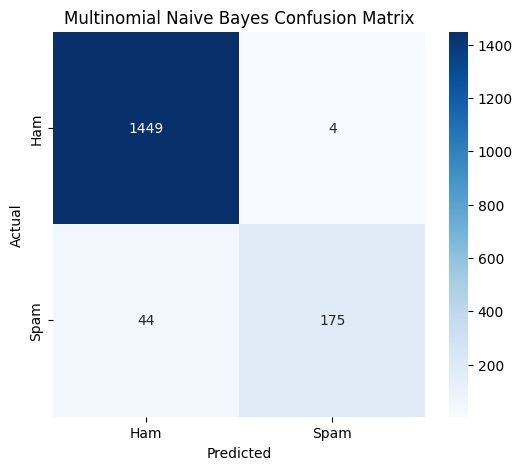

In [ ]:

plot_confusion_matrix(y_test, y_pred_mnb, title='Multinomial Naive Bayes Confusion Matrix')


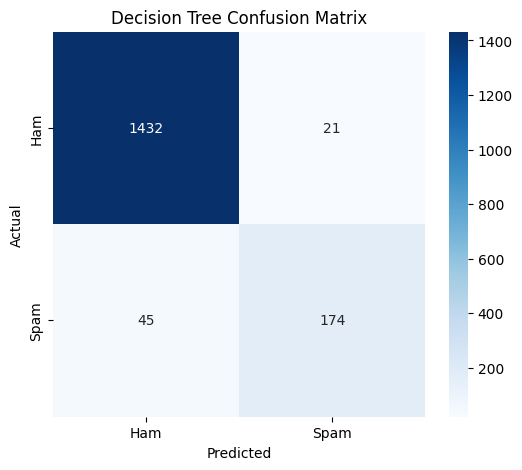

In [ ]:

plot_confusion_matrix(y_test, y_pred_dt, title='Decision Tree Confusion Matrix')


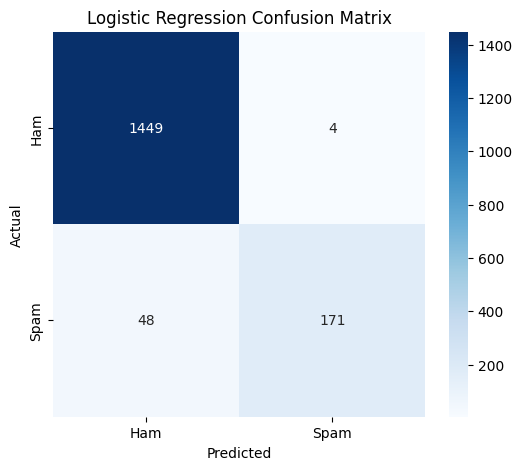

In [ ]:

plot_confusion_matrix(y_test, y_pred_lr, title='Logistic Regression Confusion Matrix')


In [ ]:
from sklearn.metrics import accuracy_score
import time


In [ ]:

accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb * 100:.2f}%")

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")


Multinomial Naive Bayes Accuracy: 97.13%
Decision Tree Accuracy: 96.05%
Logistic Regression Accuracy: 96.89%


In [ ]:

error_rate_mnb = 1 - accuracy_mnb
print(f"Multinomial Naive Bayes Error Rate: {error_rate_mnb:.2f}")
error_rate_dt = 1 - accuracy_dt
print(f"Decision Tree Error Rate: {error_rate_dt:.2f}")
error_rate_lr = 1 - accuracy_lr
print(f"Logistic Regression Error Rate: {error_rate_lr:.2f}")


Multinomial Naive Bayes Error Rate: 0.03
Decision Tree Error Rate: 0.04
Logistic Regression Error Rate: 0.03


In [ ]:

start_time = time.time()
mnb_model.fit(X_train_tfidf, y_train)
train_time_mnb = time.time() - start_time

start_time = time.time()
y_pred_mnb = mnb_model.predict(X_test_tfidf)
test_time_mnb = time.time() - start_time

print(f"Multinomial Naive Bayes Training Time: {train_time_mnb:.4f} seconds")
print(f"Multinomial Naive Bayes Testing Time: {test_time_mnb:.4f} seconds")
start_time = time.time()
dt_model.fit(X_train_tfidf, y_train)
train_time_dt = time.time() - start_time

start_time = time.time()
y_pred_dt = dt_model.predict(X_test_tfidf)
test_time_dt = time.time() - start_time

print(f"Decision Tree Training Time: {train_time_dt:.4f} seconds")
print(f"Decision Tree Testing Time: {test_time_dt:.4f} seconds")
start_time = time.time()
lr_model.fit(X_train_tfidf, y_train)
train_time_lr = time.time() - start_time

start_time = time.time()
y_pred_lr = lr_model.predict(X_test_tfidf)
test_time_lr = time.time() - start_time

print(f"Logistic Regression Training Time: {train_time_lr:.4f} seconds")
print(f"Logistic Regression Testing Time: {test_time_lr:.4f} seconds")


Multinomial Naive Bayes Training Time: 0.0207 seconds
Multinomial Naive Bayes Testing Time: 0.0006 seconds
Decision Tree Training Time: 0.1698 seconds
Decision Tree Testing Time: 0.0014 seconds
Logistic Regression Training Time: 0.0239 seconds
Logistic Regression Testing Time: 0.0005 seconds


In [ ]:

results = pd.DataFrame({
    'Model': ['Multinomial Naive Bayes', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [accuracy_mnb, accuracy_dt, accuracy_lr],
    'Error Rate': [error_rate_mnb, error_rate_dt, error_rate_lr],
    'Training Time (s)': [train_time_mnb, train_time_dt, train_time_lr],
    'Testing Time (s)': [test_time_mnb, test_time_dt, test_time_lr]
})

print("\nModel Comparison:")
print(results)



Model Comparison:
                     Model  Accuracy  Error Rate  Training Time (s)  \
0  Multinomial Naive Bayes  0.971292    0.028708           0.020652   
1            Decision Tree  0.960526    0.039474           0.169803   
2      Logistic Regression  0.968900    0.031100           0.023863   

   Testing Time (s)  
0          0.000607  
1          0.001419  
2          0.000517  
